Missing values in dataset: VV        0
PM 2.5    0
dtype: int64
First 10 X values (cleaned): [0.5 0.6 0.6 0.8 1.3 0.6 0.5 0.8 1.8 1.1]
First 10 Y values: [219.7208333 182.1875    154.0375    223.2083333 200.6458333 285.225
 236.825     276.9083333 108.        107.625    ]
Closed-Form Solution - Final slope (m): -64.82932717309289
Closed-Form Solution - Final intercept (c): 238.97523457400519


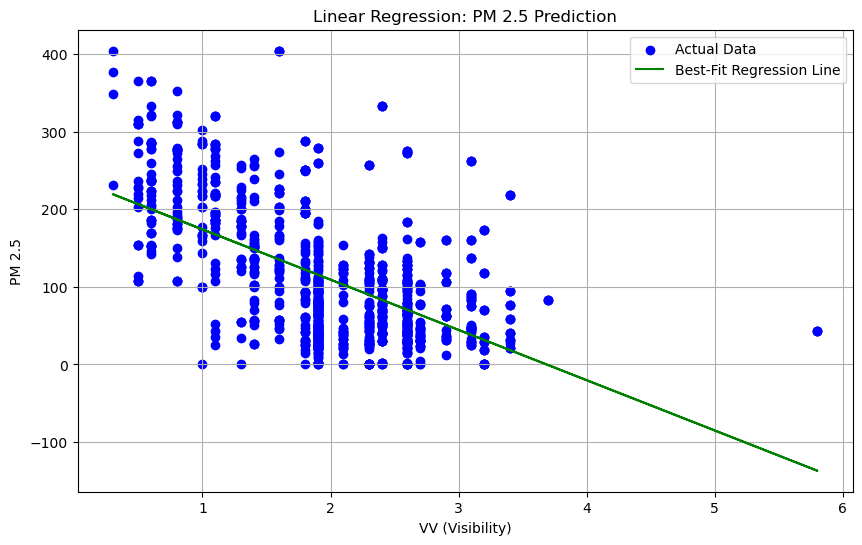

First 10 Predictions (Closed-Form): [206.56057099 200.07763827 200.07763827 187.11177284 154.69710925
 200.07763827 206.56057099 187.11177284 122.28244566 167.66297468]


In [5]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("C:\\Users\\aryan\\Downloads\\AQI_Data - AQI_Data.csv")

# Drop rows with missing values in relevant columns
df = df[['VV', 'PM 2.5']].dropna()

# Debug: Check if there are still any missing values
print("Missing values in dataset:", df.isnull().sum())

# Select feature (X) and target (Y)
X = df['VV'].to_numpy()  # Feature
Y = df['PM 2.5'].to_numpy()  # Target

# Debug: Print first few values of X and Y
print("First 10 X values (cleaned):", X[:10])
print("First 10 Y values:", Y[:10])

### PART 1: Closed-Form Solution (Best-Fit Line) ###
# Calculate slope (m) and intercept (c) analytically
mean_X = np.mean(X)
mean_Y = np.mean(Y)
numerator = np.sum((X - mean_X) * (Y - mean_Y))
denominator = np.sum((X - mean_X)**2)
m_best = numerator / denominator
c_best = mean_Y - m_best * mean_X

print(f"Closed-Form Solution - Final slope (m): {m_best}")
print(f"Closed-Form Solution - Final intercept (c): {c_best}")

# Make predictions using closed-form solution
Y_pred_best = m_best * X + c_best

### Plot results ###
plt.figure(figsize=(10, 6))

# Scatterplot of actual data
plt.scatter(X, Y, color='blue', label='Actual Data')

# Regression line from closed-form solution
plt.plot(X, Y_pred_best, color='green', label='Best-Fit Regression Line')

# Plot settings
plt.xlabel('VV (Visibility)')
plt.ylabel('PM 2.5')
plt.title('Linear Regression: PM 2.5 Prediction')
plt.legend()
plt.grid()
plt.savefig("C:\\Users\\aryan\\OneDrive\\Desktop\\TEST\\BestFit_Regression_Cleaned.png", bbox_inches='tight')
plt.show()

# Debug: Print comparison of predictions
print("First 10 Predictions (Closed-Form):", Y_pred_best[:10])
